# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
data = pd.read_csv("../Data/metadata.csv")
data.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


# Exploratory Data Analysis

In [3]:
data.shape

(950, 30)

In [4]:
data.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [6]:
data.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,697.000000,713.000000,78.000000,119.000000,16.000000,28.000000,40.000000
mean,9.083214,53.534362,38.898718,78.475630,5.024375,5.307143,4.638050
std,31.664077,16.949007,6.494383,38.742573,2.660341,3.489956,20.550033
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.800000,55.000000,3.067500,2.725000,0.746500
50%,5.000000,54.000000,38.150000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,68.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [7]:
data['finding'].unique()

array(['Pneumonia/Viral/COVID-19', 'Pneumonia', 'Pneumonia/Viral/SARS',
       'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Bacterial/Streptococcus', 'No Finding',
       'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli',
       'Pneumonia/Bacterial/Klebsiella', 'Pneumonia/Bacterial/Legionella',
       'Unknown', 'Pneumonia/Lipoid', 'Pneumonia/Viral/Varicella',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Viral/Influenza', 'todo', 'Tuberculosis',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Fungal/Aspergillosis',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Bacterial/Staphylococcus/MRSA'], dtype=object)

In [8]:
finds = data['finding'].unique()
unique_finds = []
for finding in finds:
    finding = finding.split('/')
    for x in finding:
        if x not in unique_finds:
            unique_finds.append(x)

print(unique_finds)

['Pneumonia', 'Viral', 'COVID-19', 'SARS', 'Fungal', 'Pneumocystis', 'Bacterial', 'Streptococcus', 'No Finding', 'Chlamydophila', 'E.Coli', 'Klebsiella', 'Legionella', 'Unknown', 'Lipoid', 'Varicella', 'Mycoplasma', 'Influenza', 'todo', 'Tuberculosis', 'H1N1', 'Aspergillosis', 'Herpes ', 'Aspiration', 'Nocardia', 'MERS-CoV', 'Staphylococcus', 'MRSA']


In [9]:
len(unique_finds)

28

In [10]:
len(data['finding'].unique())

25

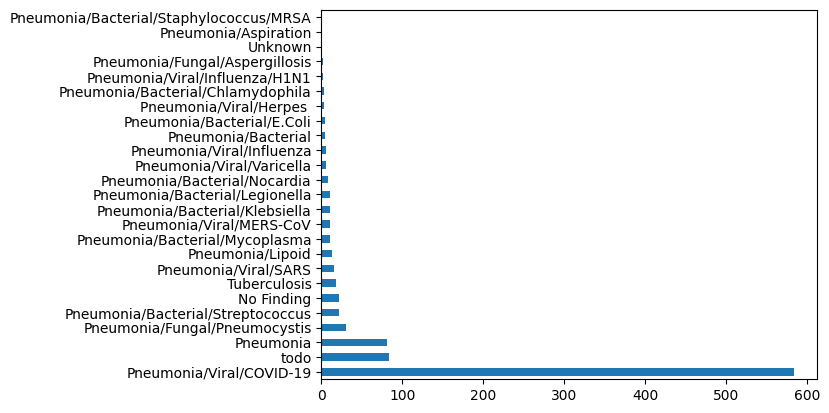

In [11]:
data['finding'].value_counts().plot(kind='barh')
plt.show()

In [12]:
data['finding'].value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [13]:
finds_array = []
for i, disease in enumerate(data['finding']):
    finds_array.append(disease)

In [14]:
splits = []

for disease in finds_array:
    if '/' in disease:
        splits.extend(disease.split('/'))
    else:
        splits.append(disease)

splits = np.array(splits)
unique_values, counts = np.unique(splits, return_counts=True)

value_counts = dict(zip(unique_values, counts))

value_counts = dict(sorted(value_counts.items(), key=lambda item: item[1]))

for value, count in value_counts.items():
    print(f"{value}: {count}")

Aspiration: 1
MRSA: 1
Staphylococcus: 1
Unknown: 1
Aspergillosis: 2
H1N1: 2
Chlamydophila: 3
Herpes : 3
E.Coli: 4
Varicella: 6
Influenza: 7
Nocardia: 8
Klebsiella: 10
Legionella: 10
MERS-CoV: 10
Mycoplasma: 11
Lipoid: 13
SARS: 16
Tuberculosis: 18
No Finding: 22
Streptococcus: 22
Pneumocystis: 30
Fungal: 32
Bacterial: 73
todo: 83
COVID-19: 584
Viral: 626
Pneumonia: 826


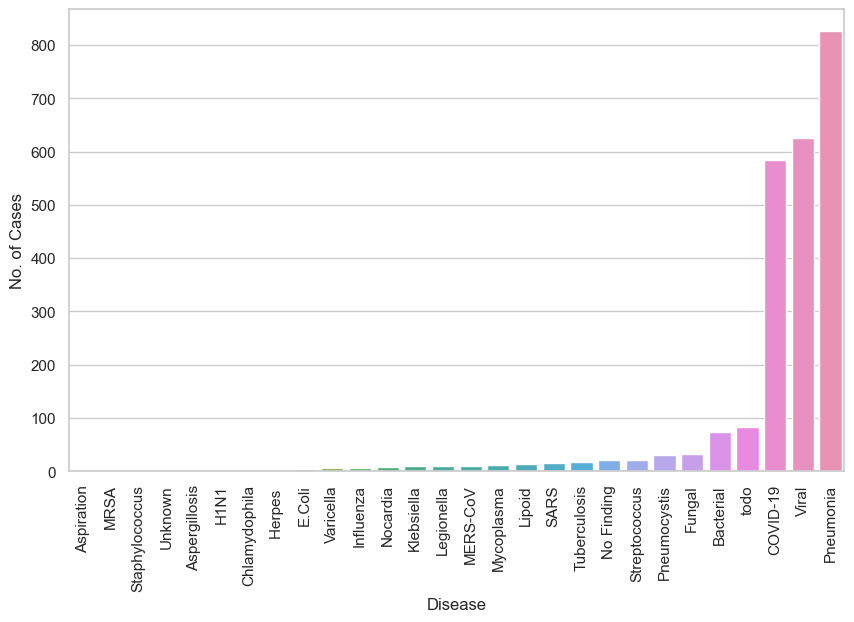

In [15]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=list(value_counts.keys()), y=list(value_counts.values()))

plt.xlabel('Disease')
plt.ylabel('No. of Cases')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [62]:
data_copy = data.copy()
for column in list(value_counts.keys()):
    data_copy[column] = 0

for i in range(0,len(data_copy)):
    diseases = data.loc[i, 'finding']
    diseases = diseases.split('/')

    for disease in diseases:
        data_copy.loc[i, disease] = 1

In [63]:
data_copy.iloc[10, :]

patientid                                                                 3
offset                                                                  9.0
sex                                                                       M
age                                                                    74.0
finding                                                Pneumonia/Viral/SARS
RT_PCR_positive                                                         NaN
survival                                                                  N
intubated                                                               NaN
intubation_present                                                      NaN
went_icu                                                                NaN
in_icu                                                                  NaN
needed_supplemental_O2                                                  NaN
extubated                                                               NaN
temperature 

In [64]:
data_copy.drop(['finding', 'Unnamed: 29'], axis=1, inplace=True)

In [65]:
data_copy.columns[28:], data.columns[29]

(Index(['Aspiration', 'MRSA', 'Staphylococcus', 'Unknown', 'Aspergillosis',
        'H1N1', 'Chlamydophila', 'Herpes ', 'E.Coli', 'Varicella', 'Influenza',
        'Nocardia', 'Klebsiella', 'Legionella', 'MERS-CoV', 'Mycoplasma',
        'Lipoid', 'SARS', 'Tuberculosis', 'No Finding', 'Streptococcus',
        'Pneumocystis', 'Fungal', 'Bacterial', 'todo', 'COVID-19', 'Viral',
        'Pneumonia'],
       dtype='object'),
 'Unnamed: 29')

In [66]:
y = data_copy.iloc[:, 28:]

In [67]:
data_copy.drop(['Aspiration', 'MRSA', 'Staphylococcus', 'Unknown', 'Aspergillosis',
        'H1N1', 'Chlamydophila', 'Herpes ', 'E.Coli', 'Varicella', 'Influenza',
        'Nocardia', 'Klebsiella', 'Legionella', 'MERS-CoV', 'Mycoplasma',
        'Lipoid', 'SARS', 'Tuberculosis', 'No Finding', 'Streptococcus',
        'Pneumocystis', 'Fungal', 'Bacterial', 'todo', 'COVID-19', 'Viral',
        'Pneumonia'], axis=1, inplace=True)

In [68]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   RT_PCR_positive         593 non-null    object 
 5   survival                361 non-null    object 
 6   intubated               248 non-null    object 
 7   intubation_present      250 non-null    object 
 8   went_icu                397 non-null    object 
 9   in_icu                  335 non-null    object 
 10  needed_supplemental_O2  90 non-null     object 
 11  extubated               37 non-null     object 
 12  temperature             78 non-null     float64
 13  pO2_saturation          119 non-null    float64
 14  leukocyte_count         16 non-null     fl

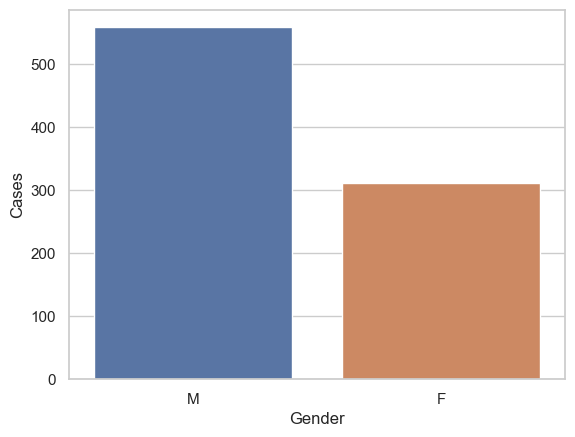

In [69]:
sns.countplot(data_copy, x='sex')
plt.xlabel('Gender')
plt.ylabel('Cases')
plt.show()

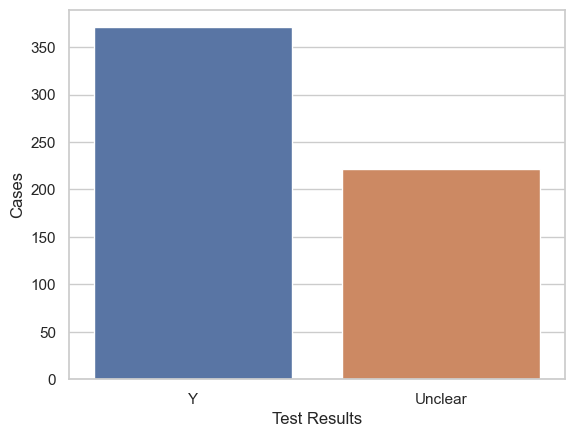

In [70]:
sns.countplot(data_copy, x='RT_PCR_positive')
plt.xlabel('Test Results')
plt.ylabel('Cases')
plt.show()

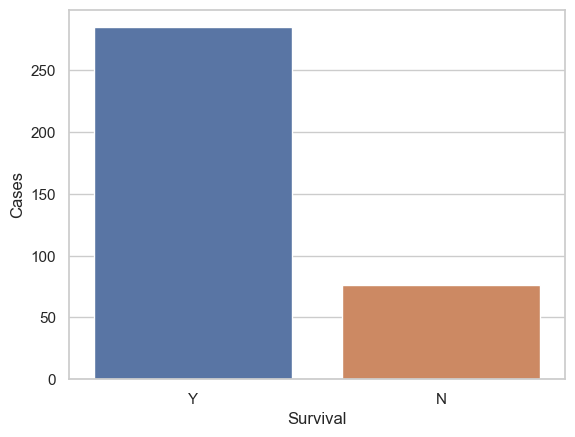

In [71]:
sns.countplot(data_copy, x='survival')
plt.xlabel('Survival')
plt.ylabel('Cases')
plt.show()

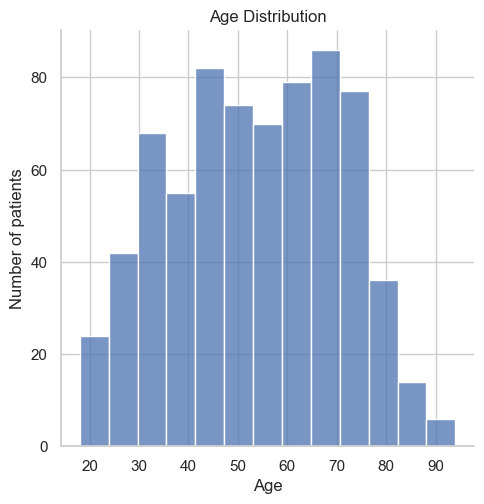

In [72]:
sns.displot(data_copy, x='age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel("Number of patients")
plt.show()

In [73]:
data_copy.drop(['license', 'url'], axis=1, inplace=True)

In [74]:
data_copy['other_notes']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
945    Case courtesy of Dr Ian Bickle, Radiopaedia.or...
946    Case courtesy of Dr Ian Bickle, Radiopaedia.or...
947                                                  NaN
948                                                  NaN
949                                                  NaN
Name: other_notes, Length: 950, dtype: object

In [75]:
data_copy.drop(['other_notes'], axis=1, inplace=True)

In [76]:
data_copy.columns

Index(['patientid', 'offset', 'sex', 'age', 'RT_PCR_positive', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi',
       'clinical_notes'],
      dtype='object')

In [77]:
data_copy.dtypes.value_counts()

object     18
float64     7
dtype: int64

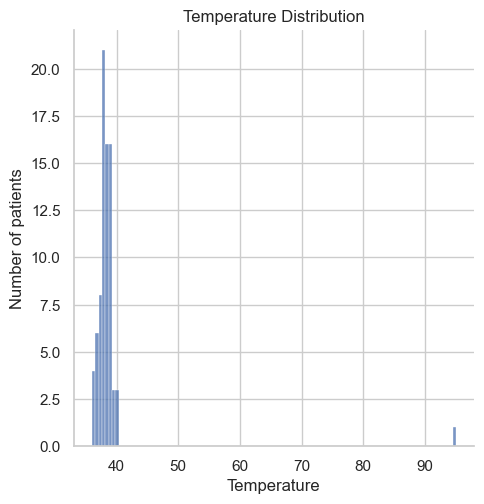

In [78]:
sns.displot(data_copy, x='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel("Number of patients")
plt.show()

In [79]:
data_copy.loc[data['temperature']>60]

,patientid,offset,sex,age,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,...,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,clinical_notes
108,55,10.0,M,87.0,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AP,X-ray,"March 7, 2020",Italy,images,7E335538-2F86-424E-A0AB-6397783A38D0.jpeg,NaN,"Male patient, 87 years old, hospitalized from ..."


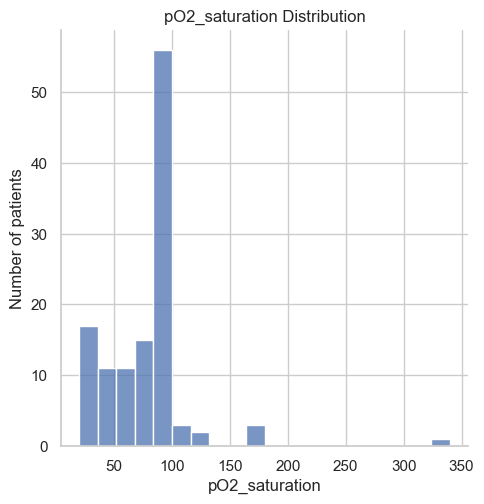

In [80]:
sns.displot(data_copy, x='pO2_saturation')
plt.title('pO2_saturation Distribution')
plt.xlabel('pO2_saturation')
plt.ylabel("Number of patients")
plt.show()

In [81]:
data_copy.loc[data['pO2_saturation']>250]

,patientid,offset,sex,age,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,...,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,clinical_notes
452,244,6.0,M,NaN,Unclear,N,NaN,NaN,Y,Y,...,NaN,NaN,AP Supine,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,d6494b39.jpg,10.6084/m9.figshare.12275009,NaN


In [82]:
data_copy.loc[data['temperature']>60]['clinical_notes']

108    Male patient, 87 years old, hospitalized from ...
Name: clinical_notes, dtype: object

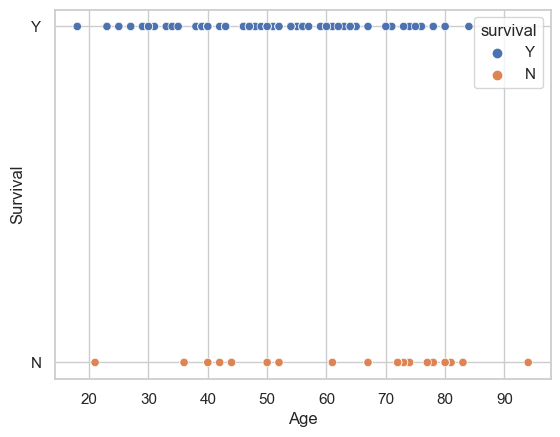

In [83]:
sns.scatterplot(data_copy, x='age', y='survival', hue='survival')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

In [84]:
data_copy.drop(['clinical_notes'], axis=1, inplace=True)

In [85]:
data_copy.columns

Index(['patientid', 'offset', 'sex', 'age', 'RT_PCR_positive', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi'],
      dtype='object')

In [86]:
data_copy['location'].unique()

array(['Cho Ray Hospital, Ho Chi Minh City, Vietnam',
       'Changhua Christian Hospital, Changhua City, Taiwan ', nan,
       'Wuhan Jinyintan Hospital, Wuhan, Hubei Province, China',
       'Mount Sinai Hospital, Toronto, Ontario, Canada',
       'Sunnybrook Health Sciences Centre, Toronto, Ontario, Canada',
       'Tongji Medical College, Wuhan, Hubei Province, China',
       'Snohomish County, Washington, United States', 'Hong Kong',
       'Sichuan Provincial People’s Hospital, Chengdu, China',
       'Myongji Hospital, Goyang, South Korea',
       'Jinling Hospital, Medical School of Nanjing University, Nanjing, Jiangsu, China',
       'Taoyuan General Hospital, Taoyuan, Taiwan', 'Jonkoping, Sweden',
       'Macao, China', 'Riccione, Italy',
       'Ospedale Santo Spirito. Rome, Italy',
       "Royal Brisbane and Women's Hospital, Brisbane, Australia",
       'Melbourne, Australia', 'Laniado Hospital, Netanya, Israel',
       'Italy', 'Hospital of Wuhan University, Wuhan, China'

In [87]:
len(data_copy['filename'].unique())

950

In [88]:
import os

len(os.listdir("../Data/images"))

930

In [89]:
a = data_copy['filename']
b = os.listdir("../Data/images")
i = 0
for file in a:
    if file in b:
        i += 1
    else:
        print(file)

print(i)

radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-14_85914_0-dcm.nii.gz
coronacases_org_001.nii.gz
coronacases_org_002.nii.gz
coronacases_org_003.nii.gz
coronacases_org_004.nii.gz
coronacases_org_005.nii.gz
coronacases_org_006.nii.gz
coronacases_org_007.nii.gz
coronacases_org_008.nii.gz
coronacases_org_009.nii.gz
coronacases_org_010.nii.gz
radiopaedia_org_covid-19-pneumonia-4_85506_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-29_86490_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-29_86491_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-23_86359_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-36_86526_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-27_86410_0-dcm.nii.gz
radiopaedia_org_covid-19-pneumonia-40_86625_0-dcm.nii.gz
929


In [96]:
data[data['filename'].str.endswith(".gz")]['filename']

53     radiopaedia_org_covid-19-pneumonia-7_85703_0-d...
56     radiopaedia_org_covid-19-pneumonia-14_85914_0-...
225                           coronacases_org_001.nii.gz
226                           coronacases_org_002.nii.gz
227                           coronacases_org_003.nii.gz
228                           coronacases_org_004.nii.gz
229                           coronacases_org_005.nii.gz
230                           coronacases_org_006.nii.gz
231                           coronacases_org_007.nii.gz
232                           coronacases_org_008.nii.gz
233                           coronacases_org_009.nii.gz
234                           coronacases_org_010.nii.gz
235    radiopaedia_org_covid-19-pneumonia-4_85506_1-d...
236    radiopaedia_org_covid-19-pneumonia-29_86490_1-...
237    radiopaedia_org_covid-19-pneumonia-29_86491_1-...
241    radiopaedia_org_covid-19-pneumonia-23_86359_0-...
242    radiopaedia_org_covid-19-pneumonia-10_85902_1-...
243    radiopaedia_org_covid-19

In [92]:
data_copy.drop(data[data['filename'].str.endswith(".gz")].index, inplace=True)
len(data_copy)

929

In [94]:
y.drop(data[data['filename'].str.endswith(".gz")].index, inplace=True)
len(y)

929

In [99]:
data_copy.columns

Index(['patientid', 'offset', 'sex', 'age', 'RT_PCR_positive', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi'],
      dtype='object')

In [102]:
data_copy['view'].unique()

array(['PA', 'AP', 'L', 'Axial', 'AP Supine', 'Coronal', 'AP Erect'],
      dtype=object)

In [103]:
data_copy['view'].value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         47
Coronal       16
AP Erect       1
Name: view, dtype: int64

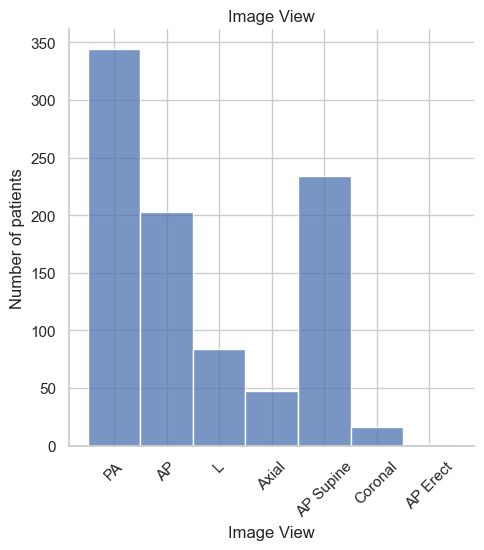

In [105]:
sns.displot(data_copy, x='view')
plt.title('Image View')
plt.xlabel('Image View')
plt.ylabel("Number of patients")
plt.xticks(rotation=45)
plt.show()

In [108]:
data['view'].value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

In [111]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 949
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               929 non-null    object 
 1   offset                  687 non-null    float64
 2   sex                     849 non-null    object 
 3   age                     692 non-null    float64
 4   RT_PCR_positive         572 non-null    object 
 5   survival                361 non-null    object 
 6   intubated               247 non-null    object 
 7   intubation_present      249 non-null    object 
 8   went_icu                396 non-null    object 
 9   in_icu                  334 non-null    object 
 10  needed_supplemental_O2  90 non-null     object 
 11  extubated               37 non-null     object 
 12  temperature             78 non-null     float64
 13  pO2_saturation          118 non-null    float64
 14  leukocyte_count         16 non-null     fl

In [117]:
data_copy.drop(['doi', 'neutrophil_count', 'lymphocyte_count', 'extubated', 'temperature', 'pO2_saturation', 'leukocyte_count', 'date', 'location', 'needed_supplemental_O2'], axis=1, inplace=True)

In [118]:
data_copy.columns

Index(['patientid', 'offset', 'sex', 'age', 'RT_PCR_positive', 'survival',
       'intubated', 'intubation_present', 'went_icu', 'in_icu', 'view',
       'modality', 'folder', 'filename'],
      dtype='object')

In [122]:
cleaned_data = pd.concat([data_copy, y], axis=1)

In [123]:
cleaned_data.shape

(929, 42)